# 2.1 Explore the Titanic dataset

In [4]:
import pandas as pd
import seaborn as sns

## Step1

In [2]:
train = pd.read_csv('data/train.csv', index_col=0)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step2 

In [4]:
d = train.groupby("Survived")

In [5]:
bar_data = d.count()

In [6]:
bar_data.reset_index(inplace=True)

In [7]:
bar_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,549,549,549,424,549,549,549,549,68,549
1,1,342,342,342,290,342,342,342,342,136,340


In [8]:
bar_data["Number"] = bar_data["Pclass"]

In [9]:
label_dict = {
    0 : "Non-surviving",
    1 : "Surviving"
}

In [10]:
bar_data["Survived_label"] = [label_dict[0], label_dict[1]]

<AxesSubplot:xlabel='Survived_label', ylabel='Number'>

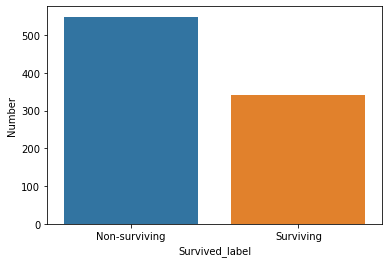

In [11]:
sns.barplot(x='Survived_label', y="Number", data=bar_data)

## step3

In [12]:
g = train.groupby(by=["Survived", "Pclass"])

In [13]:
count_data = g.count()
count_data["number"] = count_data["Name"]

In [14]:
count_data

Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked  \
Survived Pclass                                                                
0        1         80   80   64     80     80      80    80     59        80   
         2         97   97   90     97     97      97    97      3        97   
         3        372  372  270    372    372     372   372      6       372   
1        1        136  136  122    136    136     136   136    117       134   
         2         87   87   83     87     87      87    87     13        87   
         3        119  119   85    119    119     119   119      6       119   

                 number  
Survived Pclass          
0        1           80  
         2           97  
         3          372  
1        1          136  
         2           87  
         3          119

In [15]:
percentage_surviving_firstclass = count_data.loc[(1,1)]['number'] / (count_data.loc[(1,1)]['number'] + count_data.loc[(0,1)]['number'])
percentage_surviving_firstclass

0.6296296296296297

## Step 4

<AxesSubplot:xlabel='Pclass', ylabel='count'>

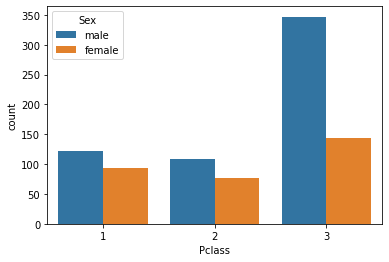

In [16]:
sns.countplot(x="Pclass", hue = "Sex", data=train)

## Step 5

<AxesSubplot:xlabel='Age', ylabel='Count'>

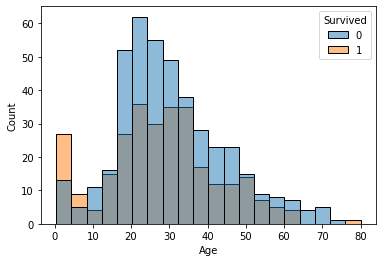

In [17]:
sns.histplot(data=train, x="Age", hue="Survived")

## Step 6

In [18]:
A = train.groupby(by=["Survived"])

In [19]:
survived_ave = A.mean()['Age'][1]
print("average age for survived passengers: ", survived_ave)
drowned_ave = A.mean()['Age'][0]
print("average age for drowned passengers: ", drowned_ave)

average age for survived passengers:  28.343689655172415
average age for drowned passengers:  30.62617924528302


## Step 7

In [20]:
train["Age"].fillna(train['Age'].mean, inplace=True)

## Step 8

In [21]:
z = train.groupby(["Survived", "Pclass", "Sex"])

In [22]:
table = [[z.count()]]

In [23]:
print(table)

[[                        Name  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Survived Pclass Sex                                                           
0        1      female     3    3      3      3       3     3      3         3
                male      77   77     77     77      77    77     56        77
         2      female     6    6      6      6       6     6      1         6
                male      91   91     91     91      91    91      2        91
         3      female    72   72     72     72      72    72      2        72
                male     300  300    300    300     300   300      4       300
1        1      female    91   91     91     91      91    91     78        89
                male      45   45     45     45      45    45     39        45
         2      female    70   70     70     70      70    70      9        70
                male      17   17     17     17      17    17      4        17
         3      female    72   72     72     72   

# 2.3 Build a Logistic Regression model

## 1. Start with the Pclass column only (because it is numerical and complete).

In [66]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
X_train = train[["Pclass"]]
y_train = train[["Survived"]]

In [27]:
m = LogisticRegression() 

In [28]:
m.fit(X_train, y_train) 

/home/damoon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [29]:
sample = train.sample(5)[["Pclass"]]

In [30]:
sample

,Pclass
PassengerId,
313,2
224,3
558,1
754,3
531,2


In [31]:
predict_first = m.predict(sample)

In [32]:
predict_first

array([0, 0, 1, 0, 0])

## 2.Print the coefficients calculated by the model.

In [33]:
m.coef_[0][0]

-0.8437120730506076

In [34]:
print ("coefficient is equal to: ", m.coef_[0][0])
print ("\ninterception is equal to: ", m.intercept_[0])

coefficient is equal to:  -0.8437120730506076

interception is equal to:  1.4325500494239256


## 3.Calculate the probabilities for your data points belonging to the positive class.

In [35]:
probs = m.predict_proba(X_train)[:, 1]

In [36]:
probs

array([0.2500049 , 0.64309848, 0.2500049 , 0.64309848, 0.2500049 ,
       0.2500049 , 0.64309848, 0.2500049 , 0.2500049 , 0.43662418,
       0.2500049 , 0.64309848, 0.2500049 , 0.2500049 , 0.2500049 ,
       0.43662418, 0.2500049 , 0.43662418, 0.2500049 , 0.2500049 ,
       0.43662418, 0.43662418, 0.2500049 , 0.64309848, 0.2500049 ,
       0.2500049 , 0.2500049 , 0.64309848, 0.2500049 , 0.2500049 ,
       0.64309848, 0.64309848, 0.2500049 , 0.43662418, 0.64309848,
       0.64309848, 0.2500049 , 0.2500049 , 0.2500049 , 0.2500049 ,
       0.2500049 , 0.43662418, 0.2500049 , 0.43662418, 0.2500049 ,
       0.2500049 , 0.2500049 , 0.2500049 , 0.2500049 , 0.2500049 ,
       0.2500049 , 0.2500049 , 0.64309848, 0.43662418, 0.64309848,
       0.64309848, 0.43662418, 0.2500049 , 0.43662418, 0.2500049 ,
       0.2500049 , 0.64309848, 0.64309848, 0.2500049 , 0.64309848,
       0.2500049 , 0.43662418, 0.2500049 , 0.2500049 , 0.2500049 ,
       0.43662418, 0.2500049 , 0.43662418, 0.2500049 , 0.25000

## 4.Suppose you classify all points with a probability > 0.9 as positive.

In [37]:
predictions = (m.predict_proba(X_train)[:,1] >= 0.9).astype(int)

In [38]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## How does the result of your prediction change?

In [39]:
## they will change to 0. Because we have selected aq very conservative threshold and no point will remain to be classified as positive.

## How does it change if you change the threshold to > 0.1?

In [40]:
predictions = (m.predict_proba(X_train)[:,1] >= 0.1).astype(int)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 2.6 feature Engineering

## Pick one of the code examples below and follow the instructions in the script.

## custom transformation

In [28]:
import pandas as pd
df = pd.read_csv('data/all_penguins_clean.csv')

In [12]:
df.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,A_3,NaN
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE


In [29]:
def custom_binner(df):
    bins = [-1, 10, 20, np.inf]
    labels = ['small', 'medium', 'large']
    x_binned = pd.cut(df, bins=bins, labels=labels, retbins=False)
    return pd.DataFrame({'x_binned':x_binned}) 

In [30]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
# bin a numerical column
binner = FunctionTransformer(custom_binner)

In [18]:
#cols = df[['Culmen Length (mm)']]
cols = df['Culmen Length (mm)']

In [19]:
binner.fit(cols) 

FunctionTransformer(func=<function custom_binner at 0x7fe678dc8430>)

In [70]:
cols

,Culmen Length (mm)
0,39.1
1,39.5
2,40.3
3,NaN
4,36.7
...,...
339,NaN
340,46.8
341,50.4
342,45.2


In [24]:
import numpy as np
t = binner.transform(cols)
#t = binner.transform(cols)

In [25]:
print(t.shape)

(344, 1)


In [55]:
print()

In [50]:
t

,x_binned
0,large
1,large
2,large
3,NaN
4,large
...,...
339,NaN
340,large
341,large
342,large


In [64]:
cols

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: Culmen Length (mm), Length: 344, dtype: float64

In [26]:
cols_new = pd.DataFrame(cols)

In [63]:
cols_new

,Culmen Length (mm)
0,39.1
1,39.5
2,40.3
3,NaN
4,36.7
...,...
339,NaN
340,46.8
341,50.4
342,45.2


In [27]:
cols_scaled = pd.DataFrame(t, columns=cols_new.columns)
print(cols_scaled.head())

   Culmen Length (mm)
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN


In [83]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [84]:
df = pd.read_csv('data/all_penguins_clean.csv', na_values='.')

In [85]:
imputer  =  SimpleImputer(strategy='most_frequent')

In [86]:
cols = df[['Sex']]

In [87]:
# count the number of missing values
print(cols['Sex'].isna().sum())

11


In [88]:
imputer.fit(cols)

SimpleImputer(strategy='most_frequent')

In [89]:
t = imputer.transform(cols)  # result is a numpy array
print(t.shape)

(344, 1)


In [95]:
# format output as a DataFame
cols_imputed = pd.DataFrame(t, columns=cols.columns)
#cols_imputed = pd.DataFrame(t, columns=imputer[1].get_feature_names())
print(cols_imputed.head())

      Sex
0    MALE
1  FEMALE
2  FEMALE
3    MALE
4  FEMALE


In [11]:
print(cols_imputed['Sex'].isna().sum())

0


## Pipleline

In [97]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [98]:
df = pd.read_csv("data/all_penguins_clean.csv", na_values=".")

In [99]:
# define a pipeline
impute_and_encode = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False)
)

In [100]:
cols = df[['Sex']]

In [101]:
impute_and_encode.fit(cols)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(sparse=False))])

In [102]:
t = impute_and_encode.transform(cols)

In [103]:
print(t.shape)

(344, 2)


In [107]:
# create a DataFrame
cols_transformed = pd.DataFrame(t, columns=impute_and_encode[1].get_feature_names())

In [108]:
print(cols_transformed.head())

   x0_FEMALE  x0_MALE
0        0.0      1.0
1        1.0      0.0
2        1.0      0.0
3        0.0      1.0
4        1.0      0.0


In [137]:
cols_transformed.isna().sum()

x0_FEMALE    0
x0_MALE      0
dtype: int64

# Feature Engineering on the Titanic Data

## Go through each column of the titanic dataset.

## check wether the column is binary, categorical or metric.

In [138]:
train = pd.read_csv('data/train.csv', index_col=0)

In [139]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [142]:
train['SibSp']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [ ]:
# column  PassengerID: this is metric
# column  Survived is binary 
# column Pclass is categorical
# column Name is categorical
# column Sex is binary/Categorical
# column Age is metric
# column ibSp is binary
# column Parch is binary
# column Ticket is categorical
# column Fare is metric
# column Cabin is categorical
# column Embarked is categorical

## check wether the column contains any missing values.

In [150]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [156]:
import seaborn as sns

<AxesSubplot:ylabel='PassengerId'>

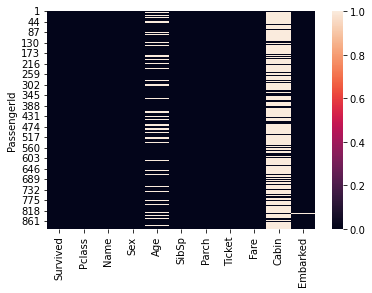

In [159]:
sns.heatmap(train.isna())

## make a list of preprocessors that you want to apply to each column.

In [ ]:
# column Pclass: OneHotEncoder
# column Name: Function Transformer
# column Sex: OneHotEncoder
# column Age: Imputer, scaler
# column SibSp: imputer when necessary
# column Parch: imputer when necessary
# column Ticket: Drop
# column Fare: StdScaler/RobustSclaer
# column Cabin:Drop
# column Embarked: Imputer, OneHot


# 2.7 Feature Engineering with ColumnTransformers

## Create a few ColumnTransformers and train them on the Titanic data. Here are a few ideas to work on:

## impute the missing values in the Age column

In [120]:
train = pd.read_csv('data/train.csv', index_col=0)

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
missing_list = ['Age', 'Cabin', 'Embarked']

In [121]:
del train['Ticket']
del train['Cabin']

In [122]:
X = train.iloc[:, 1:]
y= train['Survived']

In [123]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S


In [124]:
# tuple name, method, columns
trans = ColumnTransformer( [('missing', SimpleImputer(strategy='most_frequent'), ['Age'] ),
                            ('do nothing', 'passthrough', ['Parch', 'SibSp'])]
                          , remainder = 'passthrough')

In [134]:
trans.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('missing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Age']),
                                ('do nothing', 'passthrough',
                                 ['Parch', 'SibSp'])])

In [135]:
X_transformed = trans.transform(X)

In [136]:
X_transformed = pd.DataFrame(X_transformed)

In [137]:
X_transformed

,0,1,2,3,4,5,6,7
0,22.0,0,1,3,"Braund, Mr. Owen Harris",male,7.25,S
1,38.0,0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C
2,26.0,0,0,3,"Heikkinen, Miss. Laina",female,7.925,S
3,35.0,0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1,S
4,35.0,0,0,3,"Allen, Mr. William Henry",male,8.05,S
...,...,...,...,...,...,...,...,...
886,27.0,0,0,2,"Montvila, Rev. Juozas",male,13.0,S
887,19.0,0,0,1,"Graham, Miss. Margaret Edith",female,30.0,S
888,24.0,2,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.45,S
889,26.0,0,0,1,"Behr, Mr. Karl Howell",male,30.0,C


In [128]:
column_names = [['Age','SibSp', 'Parch', 'Pclass', 'Name', 'Sex', 'Fare','Embarked']]

In [129]:
X_transformed = pd.DataFrame(X_transformed, columns=column_names )

In [230]:
X_transformed

,Age,SibSp,Parch,Pclass,Name,Sex,Fare,Embarked
0,22.0,0,1,3,"Braund, Mr. Owen Harris",male,7.25,S
1,38.0,0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C
2,26.0,0,0,3,"Heikkinen, Miss. Laina",female,7.925,S
3,35.0,0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1,S
4,35.0,0,0,3,"Allen, Mr. William Henry",male,8.05,S
...,...,...,...,...,...,...,...,...
886,27.0,0,0,2,"Montvila, Rev. Juozas",male,13.0,S
887,19.0,0,0,1,"Graham, Miss. Margaret Edith",female,30.0,S
888,24.0,2,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.45,S
889,26.0,0,0,1,"Behr, Mr. Karl Howell",male,30.0,C


In [132]:
trans.get_feature_names()

AttributeError: Transformer missing (type SimpleImputer) does not provide get_feature_names.

In [133]:
get_feature_names_manual(trans)

/tmp/ipykernel_5552/4220478432.py:30: UserWarning: Transformer missing (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['missing__Age', 'Parch', 'SibSp', 'Pclass', 'Name', 'Sex', 'Fare', 'Embarked']

## one-hot-encode the Embarked column

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
trans_onehot = ColumnTransformer( [('OneHot', OneHotEncoder(), ['Embarked'])], remainder = 'passthrough')

In [141]:
trans_onehot.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(), ['Embarked'])])

In [143]:
X_onehoted = trans_onehot.transform(X)

In [144]:
trans_onehot.get_feature_names()

['OneHot__x0_C',
 'OneHot__x0_Q',
 'OneHot__x0_S',
 'OneHot__x0_nan',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare']

In [236]:
X_onehoted = pd.DataFrame(X_onehoted, columns = trans_new.get_feature_names())

In [237]:
X_onehoted

,OneHot__x0_C,OneHot__x0_Q,OneHot__x0_S,OneHot__x0_nan,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25
1,1.0,0.0,0.0,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,0.0,0.0,1.0,0.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.925
3,0.0,0.0,1.0,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1
4,0.0,0.0,1.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0
887,0.0,0.0,1.0,0.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0
888,0.0,0.0,1.0,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45
889,1.0,0.0,0.0,0.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0


## bin the imputed Age column into 3 bins (young, middle-aged, old)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [59]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


In [60]:
X.dropna(inplace=True)

In [61]:
X.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [62]:
X.shape

(712, 8)

In [63]:
from sklearn.preprocessing import KBinsDiscretizer

In [64]:
trans_bin = ColumnTransformer([('binner', KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile') ,['Age'])], remainder='passthrough')

In [66]:
trans_bin.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('binner',
                                 KBinsDiscretizer(encode='onehot-dense',
                                                  n_bins=3),
                                 ['Age'])])

In [67]:
X_binned = trans_bin.transform(X)

In [68]:
X_binned = pd.DataFrame(X_binned)

In [69]:
X_binned.shape

(712, 10)

In [70]:
X_binned

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,3,"Braund, Mr. Owen Harris",male,1,0,7.25,S
1,0.0,0.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,0.0,1.0,0.0,3,"Heikkinen, Miss. Laina",female,0,0,7.925,S
3,0.0,0.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1,S
4,0.0,0.0,1.0,3,"Allen, Mr. William Henry",male,0,0,8.05,S
...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,3,"Rice, Mrs. William (Margaret Norton)",female,0,5,29.125,Q
708,0.0,1.0,0.0,2,"Montvila, Rev. Juozas",male,0,0,13.0,S
709,1.0,0.0,0.0,1,"Graham, Miss. Margaret Edith",female,0,0,30.0,S
710,0.0,1.0,0.0,1,"Behr, Mr. Karl Howell",male,0,0,30.0,C


In [75]:
column_names = [['Young','Middle-ages', 'Old', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch','Fare','Embarked']]

In [76]:
X_binned.columns = column_names

In [77]:
X_binned

,Young,Middle-ages,Old,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.0,3,"Braund, Mr. Owen Harris",male,1,0,7.25,S
1,0.0,0.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,0.0,1.0,0.0,3,"Heikkinen, Miss. Laina",female,0,0,7.925,S
3,0.0,0.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1,S
4,0.0,0.0,1.0,3,"Allen, Mr. William Henry",male,0,0,8.05,S
...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,3,"Rice, Mrs. William (Margaret Norton)",female,0,5,29.125,Q
708,0.0,1.0,0.0,2,"Montvila, Rev. Juozas",male,0,0,13.0,S
709,1.0,0.0,0.0,1,"Graham, Miss. Margaret Edith",female,0,0,30.0,S
710,0.0,1.0,0.0,1,"Behr, Mr. Karl Howell",male,0,0,30.0,C


In [109]:
get_feature_names_manual(trans_bin)

/tmp/ipykernel_5552/4220478432.py:30: UserWarning: Transformer binner (type KBinsDiscretizer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['binner__Age', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

## scale the Fare column

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
trans_scale = ColumnTransformer([('my_scaler', StandardScaler(), ['Fare'])], remainder='passthrough')

In [88]:
trans_scale.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('my_scaler', StandardScaler(), ['Fare'])])

In [89]:
X_scaled = trans_scale.transform(X)

In [91]:
X_scaled = pd.DataFrame(X_scaled)

In [92]:
X_scaled

,0,1,2,3,4,5,6,7
0,-0.51638,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,0.694046,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,-0.50362,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,0.350326,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,-0.501257,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
707,-0.102875,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,Q
708,-0.407687,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
709,-0.086335,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
710,-0.086335,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [95]:
import warnings
import sklearn
import pandas as pd

In [98]:
def get_feature_names_manual(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [99]:
get_feature_names_manual(trans_scale)

/tmp/ipykernel_5552/4220478432.py:30: UserWarning: Transformer my_scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['my_scaler__Fare',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Embarked']

In [100]:
X_scaled.columns = get_feature_names_manual(trans_scale)

/tmp/ipykernel_5552/4220478432.py:30: UserWarning: Transformer my_scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [101]:
X_scaled

,my_scaler__Fare,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,-0.51638,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,0.694046,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,-0.50362,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,0.350326,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,-0.501257,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
707,-0.102875,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,Q
708,-0.407687,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
709,-0.086335,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
710,-0.086335,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [104]:
X_scaled['my_scaler__Fare'].mean()

-6.221614983503335e-17

In [107]:
X_scaled['my_scaler__Fare'].std()

1.0007029877845375